In [2]:
#Pulling the data from coinmarketcap via its api
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'a1be3b80-8fee-41a7-bd9f-88c2a8b5cb9f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-11-21T18:36:36.520Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 10140}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11806, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [3]:
import pandas as pd
import datetime
#You want to set option to allow display of max columns

pd.set_option('display.max_columns', None)

#Now we load the data into our dataframe and normalize it to make it pretty

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11806,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.978550e+07,1.978550e+07,False,NaN,1,NaN,NaN,None,2024-11-21T18:36:00.000Z,98355.049836,1.002122e+11,31.3492,0.831398,4.398153,10.132927,45.913698,56.128579,55.507385,1.946003e+12,59.8252,2.065456e+12,None,2024-11-21T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-21 21:37:11.016193
1,1027,Ethereum,ETH,ethereum,9580,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204275e+08,1.204275e+08,True,NaN,2,NaN,NaN,None,2024-11-21T18:36:00.000Z,3354.002978,4.938051e+10,60.6213,0.461230,9.339361,6.722262,27.691999,29.894582,22.952290,4.039143e+11,12.4174,4.039143e+11,None,2024-11-21T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-21 21:37:11.016193
2,825,Tether USDt,USDT,tether,104654,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.301511e+11,1.319757e+11,True,NaN,3,NaN,NaN,None,2024-11-21T18:36:00.000Z,1.000703,1.888083e+11,27.0968,0.010799,-0.041172,0.020513,0.134700,0.023177,0.047121,1.302425e+11,3.9982,1.320684e+11,None,2024-11-21T18:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-21 21:37:11.016193
3,5426,Solana,SOL,solana,792,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.745926e+08,5.886474e+08,True,NaN,4,NaN,NaN,None,2024-11-21T18:36:00.000Z,258.831541,1.019755e+10,50.1385,0.402534,11.178970,20.160926,53.827931,78.976854,74.060395,1.228395e+11,3.7710,1.523605e+11,None,2024-11-21T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-21 21:37:11.016193
4,1839,BNB,BNB,bnb,2286,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440106e+08,1.440106e+08,False,NaN,5,NaN,NaN,None,2024-11-21T18:36:00.000Z,620.758605,2.679193e+09,24.8374,0.093243,2.644673,-2.521580,4.483456,6.126122,6.163626,8.939584e+10,2.7456,8.939584e+10,None,2024-11-21T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-21 21:37:11.016193
5,52,XRP,XRP,xrp,1433,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.693124e+10,9.998701e+10,False,NaN,6,NaN,NaN,None,2024-11-21T18:36:00.000Z,1.195600,7.783194e+09,18.1481,6.723334,10.278855,55.148868,123.817361,102.325162,96.766453,6.806701e+10,2.0895,1.195600e+11,None,2024-11-21T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-21 21:37:11.016193
6,74,Dogecoin,DOGE,dogecoin,1105,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.468861e+11,1.468861e+11,True,NaN,7,NaN,NaN,None,2024-11-21T18:36:00.000Z,0.384466,8.105199e+09,-19.8008,-0.467271,3.282550,-2.831828,174.896422,261.176700,240.444100,5.647277e+10,1.7361,5.647277e+10,None,2024-11-21T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-21 21:37:11.016193
7,3408,USDC,USDC,usd-coin,23257,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.777704e+10,3.777704e+10,False,NaN,8,NaN,NaN,None,2024-11-21T18:36:00.000Z,0.999999,1.413965e+10,20.9868,0.007563,0.010953,-0.002542,0.013054,-0.047562,-0.009148,3.777700e+10,1.1614,3.777700e+10,None,2024-11-21T18:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-21 21:37:11.016193
8,2010,Cardano,ADA,cardano,1358,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.5

In [8]:
def api_runner() :
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'a1be3b80-8fee-41a7-bd9f-88c2a8b5cb9f',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e) 
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')

    df = pd.concat([df, df2], ignore_index=True)


In [9]:
import os
from time import time
from time import sleep

for i in range(300) :
    api_runner()
    print('Api run successfully')
    sleep(60)
exit()



{'status': {'timestamp': '2024-11-22T05:25:53.594Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 10140}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11806, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [11]:
df.head(50)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11806,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.978550e+07,1.978550e+07,False,NaN,1,NaN,NaN,None,2024-11-21T18:36:00.000Z,98355.049836,1.002122e+11,31.3492,0.831398,4.398153,10.132927,45.913698,56.128579,55.507385,1.946003e+12,59.8252,2.065456e+12,None,2024-11-21T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-21 21:37:11.016193
1,1027,Ethereum,ETH,ethereum,9580,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204275e+08,1.204275e+08,True,NaN,2,NaN,NaN,None,2024-11-21T18:36:00.000Z,3354.002978,4.938051e+10,60.6213,0.461230,9.339361,6.722262,27.691999,29.894582,22.952290,4.039143e+11,12.4174,4.039143e+11,None,2024-11-21T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-21 21:37:11.016193
2,825,Tether USDt,USDT,tether,104654,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.301511e+11,1.319757e+11,True,NaN,3,NaN,NaN,None,2024-11-21T18:36:00.000Z,1.000703,1.888083e+11,27.0968,0.010799,-0.041172,0.020513,0.134700,0.023177,0.047121,1.302425e+11,3.9982,1.320684e+11,None,2024-11-21T18:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-21 21:37:11.016193
3,5426,Solana,SOL,solana,792,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.745926e+08,5.886474e+08,True,NaN,4,NaN,NaN,None,2024-11-21T18:36:00.000Z,258.831541,1.019755e+10,50.1385,0.402534,11.178970,20.160926,53.827931,78.976854,74.060395,1.228395e+11,3.7710,1.523605e+11,None,2024-11-21T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-21 21:37:11.016193
4,1839,BNB,BNB,bnb,2286,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440106e+08,1.440106e+08,False,NaN,5,NaN,NaN,None,2024-11-21T18:36:00.000Z,620.758605,2.679193e+09,24.8374,0.093243,2.644673,-2.521580,4.483456,6.126122,6.163626,8.939584e+10,2.7456,8.939584e+10,None,2024-11-21T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-21 21:37:11.016193
5,52,XRP,XRP,xrp,1433,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.693124e+10,9.998701e+10,False,NaN,6,NaN,NaN,None,2024-11-21T18:36:00.000Z,1.195600,7.783194e+09,18.1481,6.723334,10.278855,55.148868,123.817361,102.325162,96.766453,6.806701e+10,2.0895,1.195600e+11,None,2024-11-21T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-21 21:37:11.016193
6,74,Dogecoin,DOGE,dogecoin,1105,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.468861e+11,1.468861e+11,True,NaN,7,NaN,NaN,None,2024-11-21T18:36:00.000Z,0.384466,8.105199e+09,-19.8008,-0.467271,3.282550,-2.831828,174.896422,261.176700,240.444100,5.647277e+10,1.7361,5.647277e+10,None,2024-11-21T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-21 21:37:11.016193
7,3408,USDC,USDC,usd-coin,23257,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.777704e+10,3.777704e+10,False,NaN,8,NaN,NaN,None,2024-11-21T18:36:00.000Z,0.999999,1.413965e+10,20.9868,0.007563,0.010953,-0.002542,0.013054,-0.047562,-0.009148,3.777700e+10,1.1614,3.777700e+10,None,2024-11-21T18:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-21 21:37:11.016193
8,2010,Cardano,ADA,cardano,1358,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.5

In [13]:
df3 = df.groupby('name', sort=False)[['quote.USD.price','quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.price,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,,
Bitcoin,98835.356951,0.084855,1.782731,12.355882,47.246420,55.213055,54.639586
Ethereum,3381.197542,-0.566867,8.463215,10.405545,29.320793,27.803885,22.945087
Tether USDt,1.000886,0.001479,0.016312,0.057946,0.162640,0.071881,0.031466
Solana,261.885755,0.094173,9.201899,25.630201,58.383671,79.362788,69.750581
BNB,632.686949,0.008454,3.671058,2.634429,7.370220,6.744489,9.343287
XRP,1.360665,-0.311037,22.597264,70.267791,156.519792,130.121354,123.783946
Dogecoin,0.394502,0.072103,2.414576,7.792887,185.129555,267.034884,250.021790
USDC,0.999846,-0.000291,-0.009079,-0.004138,0.004864,-0.034930,-0.014696
Cardano,0.871994,-0.867272,9.867222,49.035876,139.698011,146.056836,123.247673


In [14]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.price                 98835.356951
              quote.USD.percent_change_1h         0.084855
              quote.USD.percent_change_24h        1.782731
              quote.USD.percent_change_7d        12.355882
              quote.USD.percent_change_30d       47.246420
                                                  ...     
Bitcoin Cash  quote.USD.percent_change_24h       -1.158608
              quote.USD.percent_change_7d        18.596079
              quote.USD.percent_change_30d       39.206594
              quote.USD.percent_change_60d       44.372218
              quote.USD.percent_change_90d       36.957116
Length: 105, dtype: float64

In [16]:
df5 = df4.to_frame('Values')
df5

Values
name                                                   
Bitcoin      quote.USD.price               98835.356951
             quote.USD.percent_change_1h       0.084855
             quote.USD.percent_change_24h      1.782731
             quote.USD.percent_change_7d      12.355882
             quote.USD.percent_change_30d     47.246420
...                                                 ...
Bitcoin Cash quote.USD.percent_change_24h     -1.158608
             quote.USD.percent_change_7d      18.596079
             quote.USD.percent_change_30d     39.206594
             quote.USD.percent_change_60d     44.372218
             quote.USD.percent_change_90d     36.957116

[105 rows x 1 columns]

In [17]:
df5.count()

Values    105
dtype: int64

In [20]:
index = pd.Index(range(105))

df6 = df5.reset_index()
df6

,name,level_1,Values
0,Bitcoin,quote.USD.price,98835.356951
1,Bitcoin,quote.USD.percent_change_1h,0.084855
2,Bitcoin,quote.USD.percent_change_24h,1.782731
3,Bitcoin,quote.USD.percent_change_7d,12.355882
4,Bitcoin,quote.USD.percent_change_30d,47.246420
...,...,...,...
100,Bitcoin Cash,quote.USD.percent_change_24h,-1.158608
101,Bitcoin Cash,quote.USD.percent_change_7d,18.596079
102,Bitcoin Cash,quote.USD.percent_change_30d,39.206594
103,Bitcoin Cash,quote.USD.percent_change_60d,44.372218


In [22]:
df7 = df6.rename(columns={'level_1' : 'quote'})
df7

,name,quote,Values
0,Bitcoin,quote.USD.price,98835.356951
1,Bitcoin,quote.USD.percent_change_1h,0.084855
2,Bitcoin,quote.USD.percent_change_24h,1.782731
3,Bitcoin,quote.USD.percent_change_7d,12.355882
4,Bitcoin,quote.USD.percent_change_30d,47.246420
...,...,...,...
100,Bitcoin Cash,quote.USD.percent_change_24h,-1.158608
101,Bitcoin Cash,quote.USD.percent_change_7d,18.596079
102,Bitcoin Cash,quote.USD.percent_change_30d,39.206594
103,Bitcoin Cash,quote.USD.percent_change_60d,44.372218


In [23]:
import seaborn as sn
import matplotlib.pyplot as plt


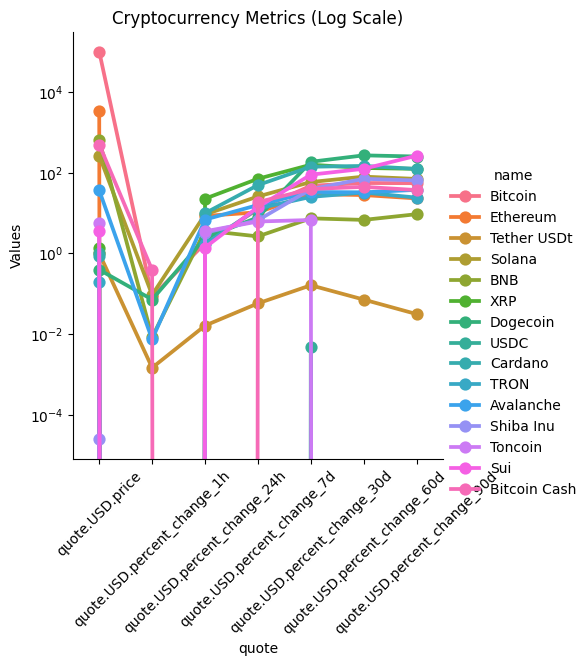

In [26]:
sn.catplot(x='quote', y = 'Values', hue = 'name', data= df7, kind='point' )
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Cryptocurrency Metrics (Log Scale)')
plt.show()

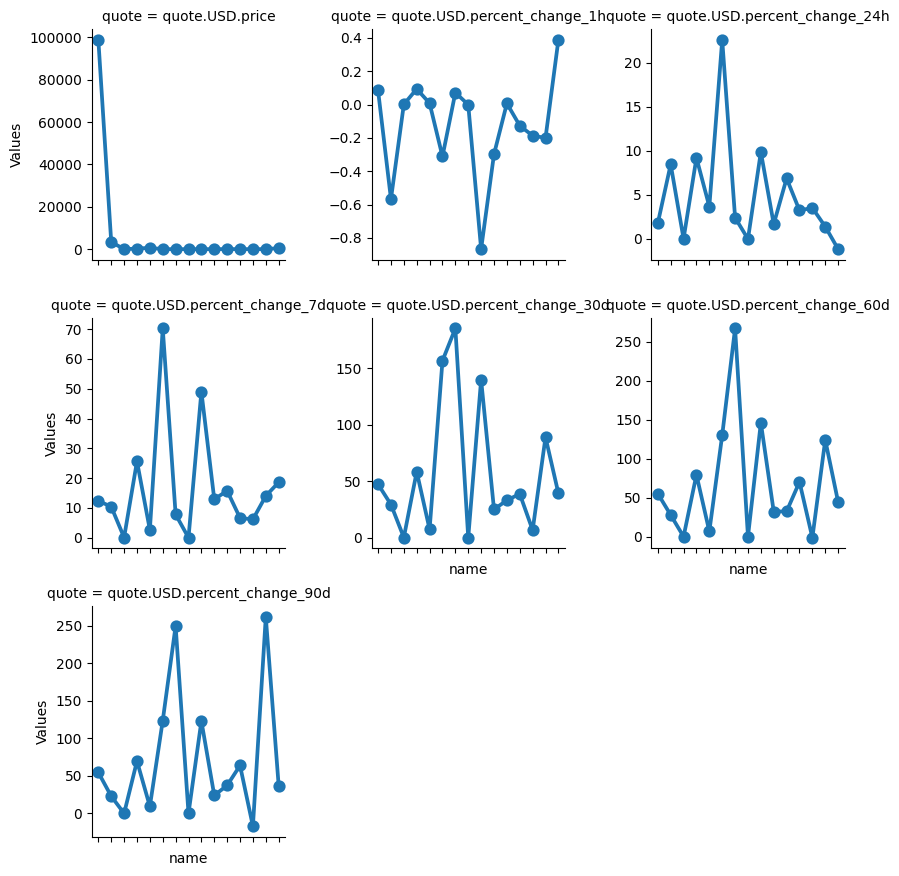

In [28]:
# Create a grid of plots for each 'quote' category
g = sn.FacetGrid(df7, col='quote', col_wrap=3, sharey=False)
g.map(sn.pointplot, 'name', 'Values', order=df7['name'].unique())
g.set_xticklabels(rotation=45)
plt.show()

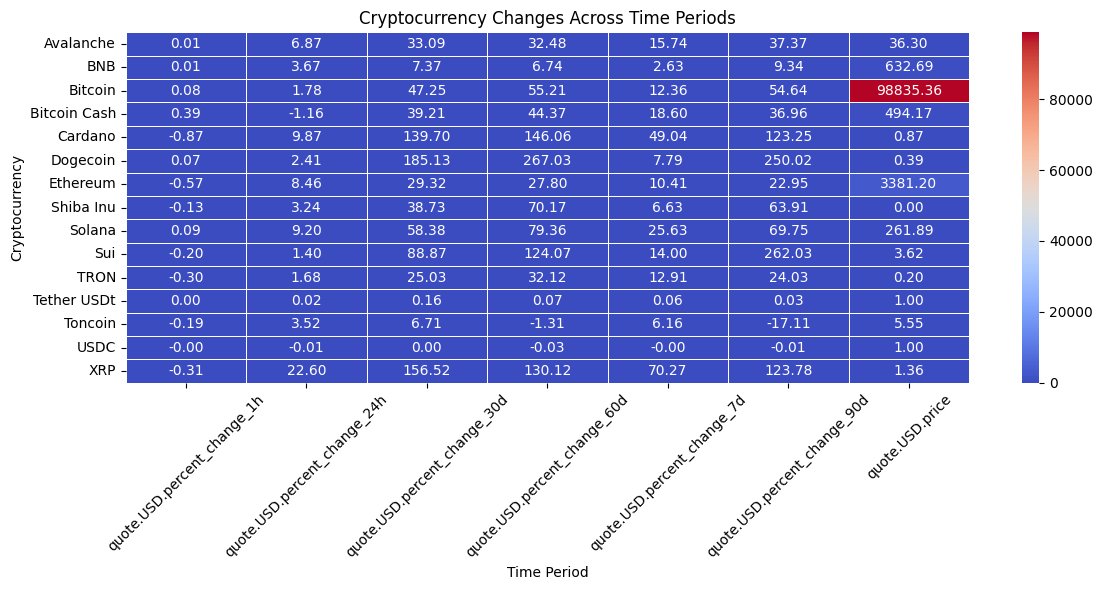

In [33]:
#Pivot the data for a heatmap
heatmap_data = df7.pivot_table(index='name', columns='quote', values='Values')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sn.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Cryptocurrency Changes Across Time Periods')
plt.xlabel('Time Period')
plt.ylabel('Cryptocurrency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
df9 = df[['name', 'quote.USD.price', 'timestamp']]
df9

,name,quote.USD.price,timestamp
0,Bitcoin,98355.049836,2024-11-21 21:37:11.016193
1,Ethereum,3354.002978,2024-11-21 21:37:11.016193
2,Tether USDt,1.000703,2024-11-21 21:37:11.016193
3,Solana,258.831541,2024-11-21 21:37:11.016193
4,BNB,620.758605,2024-11-21 21:37:11.016193
...,...,...,...
100,Avalanche,36.353278,2024-11-22 08:31:00.811415
101,Shiba Inu,0.000025,2024-11-22 08:31:00.811415
102,Toncoin,5.558554,2024-11-22 08:31:00.811415
103,Sui,3.615904,2024-11-22 08:31:00.811415
